In [1]:
seriesId = 'NHSDPCS' #FRED data series ID
apiKey = "c71c855489afb5327e992f3829276b54" #personal key, need to get one per app

In [2]:
#get FRED series data and return data frame
import certifi
import urllib3
import json

def getFREDSeriesData (seriesId, apiKey): 
    http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED', ca_certs=certifi.where())
    requestUrl = "https://api.stlouisfed.org/fred/series/observations?series_id=" + seriesId + "&api_key=" + apiKey + "&file_type=json"

    payload = http.request('GET', requestUrl)
    rawData = json.loads(payload.data.decode('utf-8'))
    df = pd.json_normalize(rawData['observations'])

    return df

In [3]:
#clean up FRED data
import pandas as pd

def cleanFREDSeriesData (df):
    df.index.name = "observationId"
    df.drop(['realtime_start', 'realtime_end'],axis=1, inplace=True)
    df['value'] = pd.to_numeric(df['value']) * 1000 #convert data from thousands
    #df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df.sort_values('date', inplace=True)

    return df

In [4]:
#date filter df
import pandas as pd
import datetime

def dateFilterDF(df, dateColumn, startDate, endDate):
    mask = (df[dateColumn] >= startDate) & (df[dateColumn] <= endDate)
    df = df.loc[mask]
    return df

In [5]:
newHmSales = getFREDSeriesData(seriesId, apiKey) #get FRED new home sales

newHmSales = cleanFREDSeriesData(newHmSales) #cleanup FRED new home sales

newHmSales = dateFilterDF(newHmSales, 'date', '2018-01-01', '2020-10-01') #filter date range on df

In [6]:
from scipy.signal import detrend

newHmSales['detrendValue'] = detrend(newHmSales['value'])

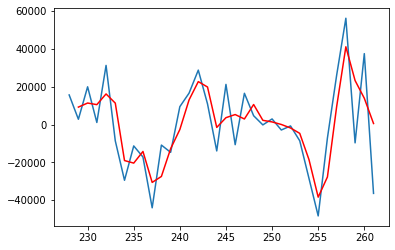

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

movingAvg = newHmSales['detrendValue'].rolling(2).mean()

plt.plot(newHmSales['detrendValue'])
plt.plot(movingAvg, color='red')